In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os
seed = 12
np.random.seed(seed)

In [2]:
df=pd.read_csv('gtzanfeatures.csv')

In [3]:
df.head()

,Unnamed: 0,genre,0,1,2,3,4,5,6,7,...,170,171,172,173,174,175,176,177,178,179
0,0,blues,-199.544205,150.090912,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,...,0.002341,0.001687,0.000848,0.000286,0.000092,0.000019,0.000003,3.084133e-07,4.041522e-08,2.022956e-08
1,1,blues,-90.722595,140.446304,-29.093889,31.684334,-13.984504,25.764742,-13.664875,11.639934,...,0.006295,0.003776,0.001930,0.000867,0.000319,0.000079,0.000014,1.691820e-06,1.500447e-07,4.219956e-08
2,2,blues,-179.347137,136.469009,-26.673138,39.984249,5.304416,10.928612,-20.564827,8.511157,...,0.001766,0.000782,0.000365,0.000130,0.000038,0.000009,0.000002,1.731935e-07,3.087752e-08,2.126652e-08
3,3,blues,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704891,15.343150,...,0.005653,0.010524,0.009256,0.001532,0.000426,0.000134,0.000019,1.835358e-06,1.724795e-07,2.505123e-08
4,4,blues,-207.501694,123.991264,8.955127,35.877651,2.907320,21.510466,-8.560436,23.370686,...,0.005881,0.006597,0.005850,0.001394,0.000210,0.000040,0.000005,6.513432e-07,2.252679e-07,1.893914e-07


In [4]:
genre=df['genre']
df=df.drop(df.columns[[1]], axis=1)
df=df.drop(df.columns[[0]], axis=1)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-199.544205,150.090912,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,...,0.002341,0.001687,0.000848,0.000286,0.000092,0.000019,0.000003,3.084133e-07,4.041522e-08,2.022956e-08
1,-90.722595,140.446304,-29.093889,31.684334,-13.984504,25.764742,-13.664875,11.639934,-11.783642,9.718760,...,0.006295,0.003776,0.001930,0.000867,0.000319,0.000079,0.000014,1.691820e-06,1.500447e-07,4.219956e-08
2,-179.347137,136.469009,-26.673138,39.984249,5.304416,10.928612,-20.564827,8.511157,-11.357249,-3.468347,...,0.001766,0.000782,0.000365,0.000130,0.000038,0.000009,0.000002,1.731935e-07,3.087752e-08,2.126652e-08
3,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704891,15.343150,-12.274110,10.976572,...,0.005653,0.010524,0.009256,0.001532,0.000426,0.000134,0.000019,1.835358e-06,1.724795e-07,2.505123e-08
4,-207.501694,123.991264,8.955127,35.877651,2.907320,21.510466,-8.560436,23.370686,-10.099661,11.900497,...,0.005881,0.006597,0.005850,0.001394,0.000210,0.000040,0.000005,6.513432e-07,2.252679e-07,1.893914e-07


In [6]:
df_combined=pd.concat([genre,df], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_combined, test_size=0.2, random_state=0)

In [8]:
train.head()

,genre,0,1,2,3,4,5,6,7,8,...,170,171,172,173,174,175,176,177,178,179
615,metal,-76.324715,123.248238,-89.870193,76.425598,-21.256561,22.300777,-13.654284,14.645465,-6.313653,...,0.000795,0.000418,0.000231,0.000101,0.000028,0.000007,0.000002,6.850640e-07,5.252901e-07,5.054800e-07
949,rock,-181.196442,103.431503,9.393625,19.079554,13.766515,-0.516950,4.391876,-7.613846,-8.117014,...,0.048736,0.057959,0.065518,0.062856,0.066891,0.057366,0.067717,6.549448e-02,6.118232e-02,4.620739e-02
864,reggae,-265.750397,80.629921,9.762896,36.671837,27.847427,12.097127,15.030740,15.123104,6.558442,...,0.004536,0.004587,0.004323,0.003805,0.004099,0.003739,0.004473,3.992428e-03,3.517887e-03,4.336349e-03
821,reggae,-91.421028,98.796951,-23.190111,46.875427,-6.847120,29.295240,-9.956196,25.666273,-10.204957,...,0.019657,0.015365,0.011514,0.005387,0.001323,0.000267,0.000059,4.956153e-06,5.537663e-07,9.923078e-08
634,metal,13.521513,78.020882,-32.996189,55.545258,-9.967193,35.406662,-17.641979,29.054089,-11.244331,...,0.206409,0.122720,0.060048,0.027729,0.009443,0.002704,0.000368,3.644221e-05,3.591095e-06,1.408831e-06


In [9]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:,:1]
print(X_train.shape)

(799, 180)


In [10]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]
print(X_test.shape)

(200, 180)


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(lb.classes_)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [14]:
import keras as k
ACCURACY_THRESHOLD = 0.99

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [20]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=300, optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               46336     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 88,138
Trainable params: 88,138
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
7/7 [==============================] - 0s 20ms/step - loss: 7.7679 - accuracy: 0.1665 - val_loss: 3.2395 - val_accuracy: 0.2450
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 2.5472 - accuracy: 0.3755 - val_

Max. Validation Accuracy 0.6850000023841858


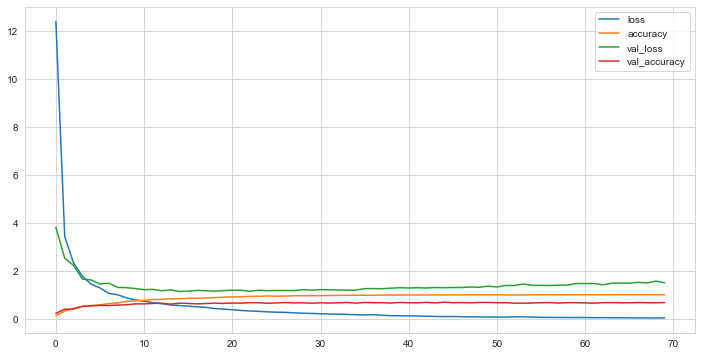

In [16]:
plotHistory(model_1_history)

In [30]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(32, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              185344    
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)              

Max. Validation Accuracy 0.7799999713897705


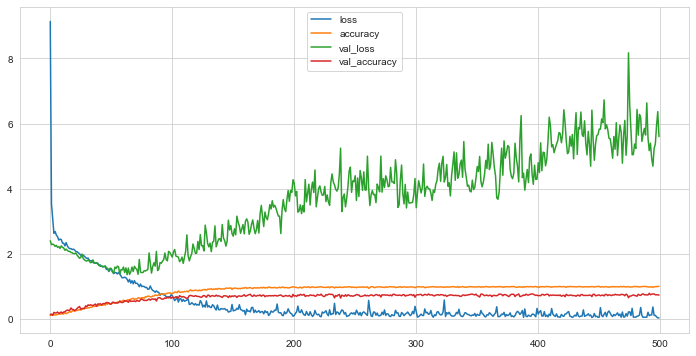

In [31]:
plotHistory(model_4_history)

In [29]:
# PREDICTIONS
predictions = model_4.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[100:150]

,Actual Values,Predicted Values
100,classical,classical
101,jazz,jazz
102,metal,hiphop
103,metal,disco
104,pop,pop
105,jazz,classical
106,classical,jazz
107,blues,blues
108,jazz,jazz
109,hiphop,hiphop


In [ ]:
model_4.save('AMLModel(2).h5')